# Global Electronics Retailer Project
---
# Overview
Analyze retail sales performance by combining customer, store, product, and sales data,  
adjusting for international exchange rates where applicable.The goal is to extract  
actionable insights about customer behavior, product performance, and store profitability.

---

# Steps

- Importing necessary libraries
- Unzip the Zipfile to get datasets
- Loading the datasets to DataFrame
- Initial Exploration
- Data cleaning
- EDA
- Create connecetion with SQL server and Load the SQL server
- Save the DataFrame as CSV

---

**Step 1- Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
%matplotlib inline

**Step 2- Unzip the Zipfile to get datasets**

In [2]:
unzip = zipfile.ZipFile("Global+Electronics+Retailer.zip")
unzip.extractall()
unzip.close()

**Step 3- Loading the Datasets to DataFrame**

In [3]:
df_customers = pd.read_csv("Customers.csv",encoding="latin1")
df_exchange_rates = pd.read_csv("Exchange_Rates.csv")
df_products = pd.read_csv("Products.csv")
df_sales = pd.read_csv("Sales.csv")
df_stores = pd.read_csv("Stores.csv")

**Step 4- Initial Exploration**

In [ ]:
# Checking first 5 row
df_customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [ ]:
# Checking last 5 row
df_customers.tail()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937
15265,2099937,Male,Zygmunt Kaminski,Bloomfield Township,MI,Michigan,48302,United States,North America,8/18/1965


In [ ]:
# checking shape
df_customers.shape

(15266, 10)

In [ ]:
# Checking statistical metrics
df_customers.describe()

,CustomerKey
count,1.526600e+04
mean,1.060508e+06
std,6.127097e+05
min,3.010000e+02
25%,5.140335e+05
50%,1.079244e+06
75%,1.593980e+06
max,2.099937e+06


In [ ]:
# Data information
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# Counting total null values
df_customers.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [ ]:
# Checking if there is duplicated value
df_customers.duplicated().sum()

np.int64(0)

In [ ]:
# Checking first 5 row
df_exchange_rates.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [ ]:
# Checking last 5 row
df_exchange_rates.tail()

,Date,Currency,Exchange
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238
11214,2/20/2021,GBP,0.7126


In [ ]:
# sahep info
df_exchange_rates.shape

(11215, 3)

In [ ]:
# Checking statistical metrics
df_exchange_rates.describe()

,Exchange
count,11215.000000
mean,1.061682
std,0.245519
min,0.628500
25%,0.857800
50%,1.000000
75%,1.311900
max,1.725300


In [ ]:
# DataFrame info
df_exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [ ]:
# Checking null values
df_exchange_rates.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [ ]:
# Checking duplicated values
df_exchange_rates.duplicated().sum()

np.int64(0)

In [ ]:
# Checking first 5 row
df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [ ]:
# Checking last 5 row
df_products.tail()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2516,2517,Contoso In-Line Coupler E180 Silver,Contoso,Silver,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [ ]:
# Data shape
df_products.shape

(2517, 10)

In [ ]:
# Checking statistical informations and metrics
df_products.describe()

,ProductKey,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824
std,726.739637,229.887134,2.299170
min,1.000000,101.000000,1.000000
25%,630.000000,305.000000,3.000000
50%,1259.000000,406.000000,4.000000
75%,1888.000000,801.000000,8.000000
max,2517.000000,808.000000,8.000000


In [ ]:
# DataFrame information
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [ ]:
# Checking null values 
df_products.isna().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [ ]:
# Checking duplicated records
df_products.duplicated().sum()

np.int64(0)

In [ ]:
# Checking first 5 row
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [ ]:
# Checking last 5 row
df_sales.tail()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD
62883,2243032,3,2/20/2021,2/23/2021,331277,0,464,7,CAD


In [ ]:
# Checking statistical metrics
df_sales.describe()

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


In [ ]:
# DataFrame information
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [ ]:
# DataFrame shape
df_sales.shape

(62884, 9)

In [ ]:
# Checking null values in DataFrame
df_sales.isna().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [ ]:
# Checking duplicated records
df_sales.duplicated().sum()

np.int64(0)

In [ ]:
# Checking first 5 row
df_stores.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [ ]:
# Checking last 5 row
df_stores.tail()

,StoreKey,Country,State,Square Meters,Open Date
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014
66,0,Online,Online,NaN,1/1/2010


In [ ]:
# DataFrame shape
df_stores.shape

(67, 5)

In [ ]:
# Checking statistical metrics
df_stores.describe()

,StoreKey,Square Meters
count,67.000000,66.000000
mean,33.000000,1402.196970
std,19.485037,576.404058
min,0.000000,245.000000
25%,16.500000,1108.750000
50%,33.000000,1347.500000
75%,49.500000,2000.000000
max,66.000000,2105.000000


In [ ]:
# DataFrame information
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [ ]:
# Checking null values 
df_stores.isna().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [ ]:
# Checking if there is a duplicated record
df_stores.duplicated().sum()

np.int64(0)

**Step 5- Data Cleaning**

In [ ]:
# Checking first 5 row
df_customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [ ]:
# Changing the Datatype of Birthday to datetime
df_customers["Birthday"] = pd.to_datetime(df_customers["Birthday"])

In [ ]:
# Creating a new age column 
from datetime import datetime
current_date = datetime.now().year
df_customers["age"] = current_date - df_customers["Birthday"].dt.year
df_customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,86
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,46
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,78
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,68
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,60


In [ ]:
# Droping null Values
df_customers.dropna(inplace=True)
null= df_customers.isna().sum()
print(null)

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
age            0
dtype: int64


In [ ]:
# Correcting the column names for clarity
df_customers.columns = df_customers.columns.str.lower().str.replace(" ","_")

In [ ]:
# Changing the data type of date to datetime
df_exchange_rates["Date"] = pd.to_datetime(df_exchange_rates["Date"])

In [ ]:
# Checking first 5 row
df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [ ]:
# Removing $ sign in unit cost usd
df_products["Unit Cost USD"] = df_products["Unit Cost USD"].str.replace("$","")

In [ ]:
# removing , in unit cost
df_products["Unit Cost USD"] = df_products["Unit Cost USD"].str.replace(",","")

In [ ]:
# Changing the data type of unit cost to float
df_products["Unit Cost USD"] = df_products["Unit Cost USD"].astype(float)

In [ ]:
# Removing $ sign in unit price usd
df_products["Unit Price USD"] = df_products["Unit Price USD"].str.replace("$","")

In [ ]:
# removing , in unit price
df_products["Unit Price USD"] = df_products["Unit Price USD"].str.replace(",","")

In [ ]:
# # Changing the data type of unit price to float
df_products["Unit Price USD"] = df_products["Unit Price USD"].astype(float)

In [ ]:
# Checking first 5 row
df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [ ]:
# Creating unit profit column 
df_products["profit"] = df_products["Unit Price USD"] - df_products["Unit Cost USD"]

In [ ]:
# Correcting column names for clarity 
df_products.columns = df_products.columns.str.lower().str.replace(" ","_")

In [ ]:
# Checking first 5 row
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [ ]:
# Checking last 5 row
df_sales.tail()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD
62883,2243032,3,2/20/2021,2/23/2021,331277,0,464,7,CAD


In [ ]:
# Filling nan values in delivery date
df_sales["Delivery Date"].fillna(method="ffill",inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_21740\138830963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales["Delivery Date"].fillna(method="ffill",inplace=True)
C:\Users\Pc\AppData\Local\Temp\ipykernel_21740\138830963.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sales["Delivery Date"].fillna(method="ffill",inplace=True)


In [ ]:
# Filling nan values in delivery date
df_sales["Delivery Date"].fillna(method="bfill",inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_21740\2812629348.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sales["Delivery Date"].fillna(method="bfill",inplace=True)


In [ ]:
# Checking null values
null_date = df_sales.isna().sum()
print(null_date)

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64


In [ ]:
# Changing the data types to datetime
df_sales["Delivery Date"] = pd.to_datetime(df_sales["Delivery Date"])
df_sales["Order Date"] = pd.to_datetime(df_sales["Order Date"])

In [ ]:
# Checking data types
df_sales.dtypes

Order Number              int64
Line Item                 int64
Order Date       datetime64[ns]
Delivery Date    datetime64[ns]
CustomerKey               int64
StoreKey                  int64
ProductKey                int64
Quantity                  int64
Currency Code            object
dtype: object

In [ ]:
# Checking first 5 row
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD


In [ ]:
# Checking first 5 row
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD


In [ ]:
# Joining two table on productkey
df_sales_merge = pd.merge(df_sales,df_products,how='left',left_on="ProductKey",right_on="productkey")
df_sales_merge.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,productkey,product_name,brand,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category,profit
0,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,1304,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,36.73
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,1048,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,285.53
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,2007,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,445.30
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,1106,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,173.92
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,373,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,159.80


In [ ]:
# Creating total sales usd for merge table 
df_sales_merge["total_sales_usd"] = df_sales_merge["Quantity"] * df_sales_merge["unit_price_usd"]

In [ ]:
# Checking first 5 row
df_sales_merge

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,productkey,...,brand,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category,profit,total_sales_usd
0,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,1304,...,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,36.73,68.00
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,1048,...,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,285.53,854.00
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,2007,...,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,445.30,665.94
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,1106,...,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,173.92,2254.00
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,373,...,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,159.80,326.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-27,1216913,43,632,3,USD,632,...,Wide World Importers,White,70.87,139.00,305,Projectors & Screens,3,Computers,68.13,417.00
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,98,...,Wide World Importers,Silver,55.18,120.00,106,Bluetooth Headphones,1,Audio,64.82,480.00
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,1613,...,Southridge Video,White,56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books",53.91,219.98
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,1717,...,Tailspin Toys,Pink,32.25,70.13,702,Download Games,7,Games and Toys,37.88,140.26


In [ ]:
# Correcting the column names for clarity
df_sales.columns = df_sales.columns.str.lower().str.replace(" ","_")

In [ ]:
# Checking first 5 row
df_stores.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [ ]:
# Changing the data tyoe of open date to date time
df_stores["Open Date"] = pd.to_datetime(df_stores["Open Date"])

In [ ]:
# Creating a new column named Store_Category 
df_stores["store_category"] = df_stores["Open Date"].dt.year.apply(lambda x: "New Store" if x > 2015 else "Old Store")

In [ ]:
# Checking first 5 row
df_stores.head()

,StoreKey,Country,State,Square Meters,Open Date,store_category
0,1,Australia,Australian Capital Territory,595.0,2008-01-01,Old Store
1,2,Australia,Northern Territory,665.0,2008-01-12,Old Store
2,3,Australia,South Australia,2000.0,2012-01-07,Old Store
3,4,Australia,Tasmania,2000.0,2010-01-01,Old Store
4,5,Australia,Victoria,2000.0,2015-12-09,Old Store


In [ ]:
# Value counts of store_category
df_stores["store_category"].value_counts()

store_category
Old Store    63
New Store     4
Name: count, dtype: int64

In [ ]:
# Checking null values
df_stores.isna().sum()

StoreKey          0
Country           0
State             0
Square Meters     1
Open Date         0
store_category    0
dtype: int64

In [ ]:
# Dropping null values
df_stores.dropna(subset="Square Meters",inplace=True)
df_stores.isna().sum()

StoreKey          0
Country           0
State             0
Square Meters     0
Open Date         0
store_category    0
dtype: int64

In [ ]:
# Correcting the column names for clarity
df_stores.columns = df_stores.columns.str.lower().str.replace(" ","_")

In [ ]:
# value counts of square meters
df_stores["square_meters"].value_counts()

square_meters
2000.0    16
350.0      4
2100.0     4
1260.0     3
1330.0     2
1120.0     2
1365.0     2
1210.0     2
1540.0     2
1300.0     2
1295.0     2
595.0      1
1105.0     1
665.0      1
310.0      1
385.0      1
245.0      1
400.0      1
1500.0     1
2105.0     1
1000.0     1
1200.0     1
1610.0     1
1855.0     1
560.0      1
1715.0     1
910.0      1
1085.0     1
1900.0     1
1800.0     1
1225.0     1
1015.0     1
1190.0     1
1645.0     1
1785.0     1
840.0      1
Name: count, dtype: int64

In [ ]:
# Creating a new column named store_size
df_stores["store_size"] = df_stores["square_meters"].apply(lambda x: "Large" if x >=2000 else "Med" if x >500 else "Small")

In [ ]:
# Value counts of store size
df_stores["store_size"].value_counts()

store_size
Med      37
Large    21
Small     8
Name: count, dtype: int64

In [ ]:
# Checking first 5 row 
df_stores.head()

,storekey,country,state,square_meters,open_date,store_category,store_size
0,1,Australia,Australian Capital Territory,595.0,2008-01-01,Old Store,Med
1,2,Australia,Northern Territory,665.0,2008-01-12,Old Store,Med
2,3,Australia,South Australia,2000.0,2012-01-07,Old Store,Large
3,4,Australia,Tasmania,2000.0,2010-01-01,Old Store,Large
4,5,Australia,Victoria,2000.0,2015-12-09,Old Store,Large


In [ ]:
# Checking data types
df_stores.dtypes

storekey                   int64
country                   object
state                     object
square_meters            float64
open_date         datetime64[ns]
store_category            object
store_size                object
dtype: object

In [ ]:
# Renaming column name
df_products.rename(columns={"profit":"unit_profit"},inplace=True)

In [ ]:
# replace 0 with nan values in storekey
df_sales["storekey"].replace(0,np.nan,inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_21740\3995488264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales["storekey"].replace(0,np.nan,inplace=True)


In [ ]:
# filling nan values 
df_sales["storekey"].fillna(method="ffill",inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_21740\2763234033.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sales["storekey"].fillna(method="ffill",inplace=True)


**Step 6- EDA**

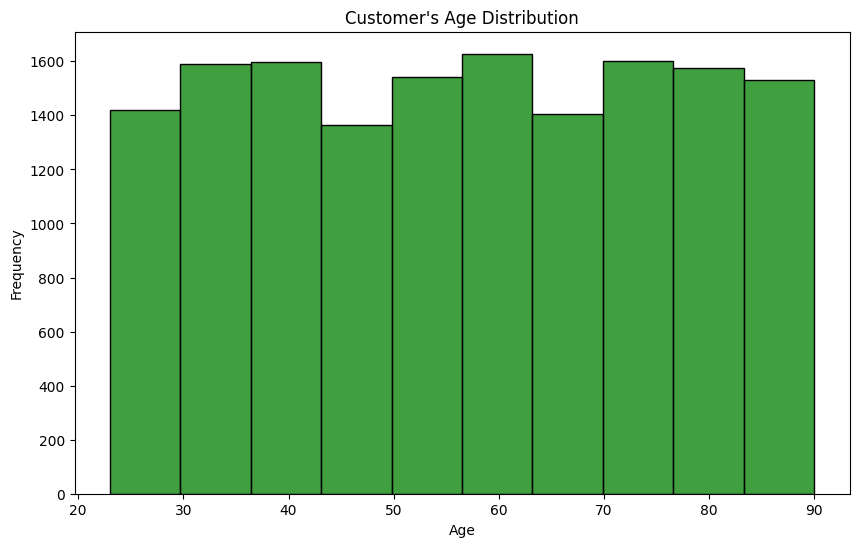

In [ ]:
# Customer Age histogram
plt.figure(figsize=(10,6))

sns.histplot(data=df_customers,x="age", bins=10,color="green", edgecolor ="black")
plt.title("Customer's Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

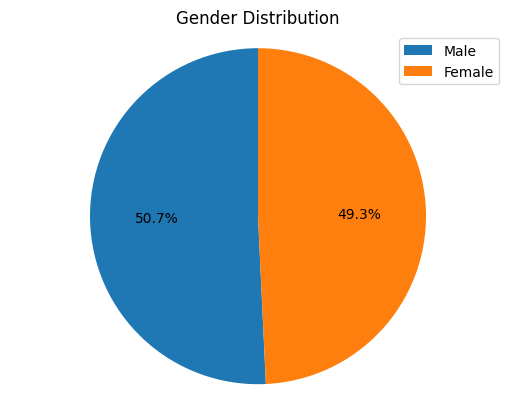

In [ ]:
# Gender Distribution
df_customers["gender"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle = 90,
    ylabel="",
    title= "Gender Distribution",
    legend=True,
    labels = None
    )
plt.axis('equal') 
plt.show()

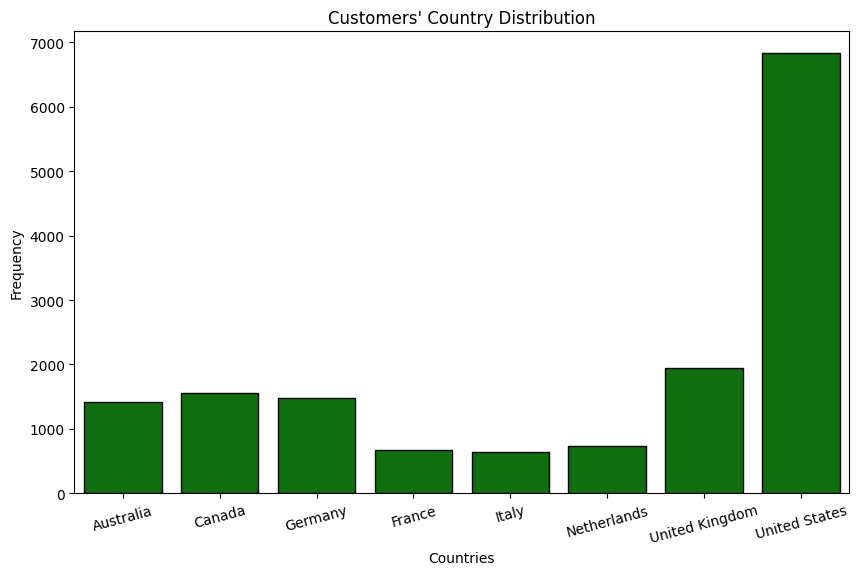

In [ ]:
# Customer's Counties
plt.figure(figsize=(10,6))
sns.countplot(data=df_customers,x="country",color="green",edgecolor = "black")
plt.title("Customers' Country Distribution")
plt.xlabel("Countries")
plt.ylabel("Frequency")
plt.xticks(rotation = 15)

plt.show()

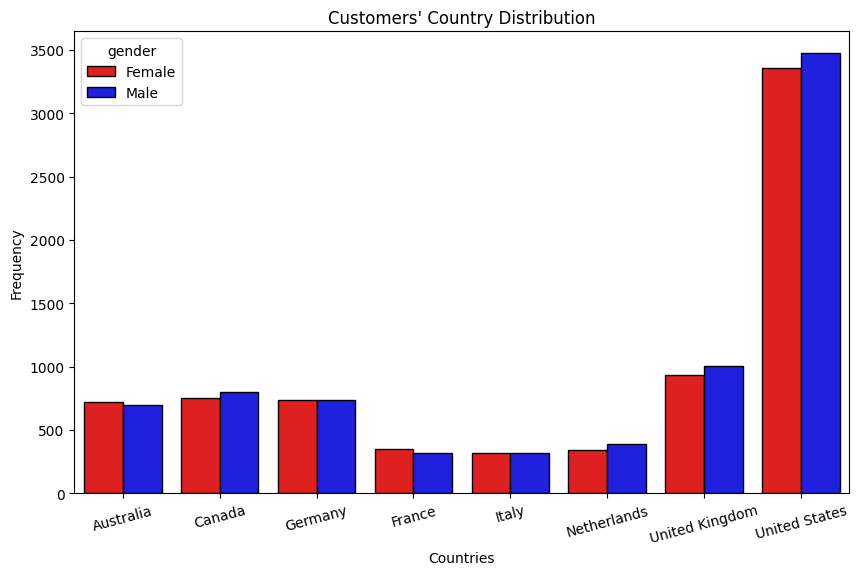

In [ ]:
# Customers Country Distributions by gender
plt.figure(figsize=(10,6))
sns.countplot(data=df_customers,x="country",color="green",edgecolor = "black", hue="gender", palette={"Female":"red","Male":"blue"})
plt.title("Customers' Country Distribution")
plt.xlabel("Countries")
plt.ylabel("Frequency")
plt.xticks(rotation = 15)

plt.show()

In [ ]:
# Checking first 5 row
df_customers.head()

,customerkey,gender,name,city,state_code,state,zip_code,country,continent,birthday,age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,86
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,46
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,78
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,68
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,60


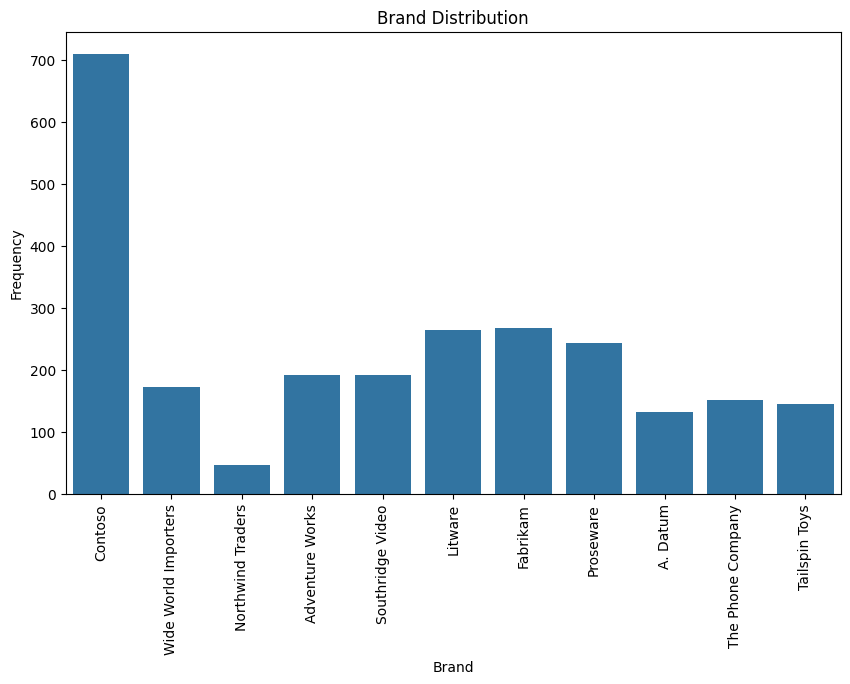

In [ ]:
# Brand Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df_products,x="brand")
plt.title("Brand Distribution")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)

plt.show()


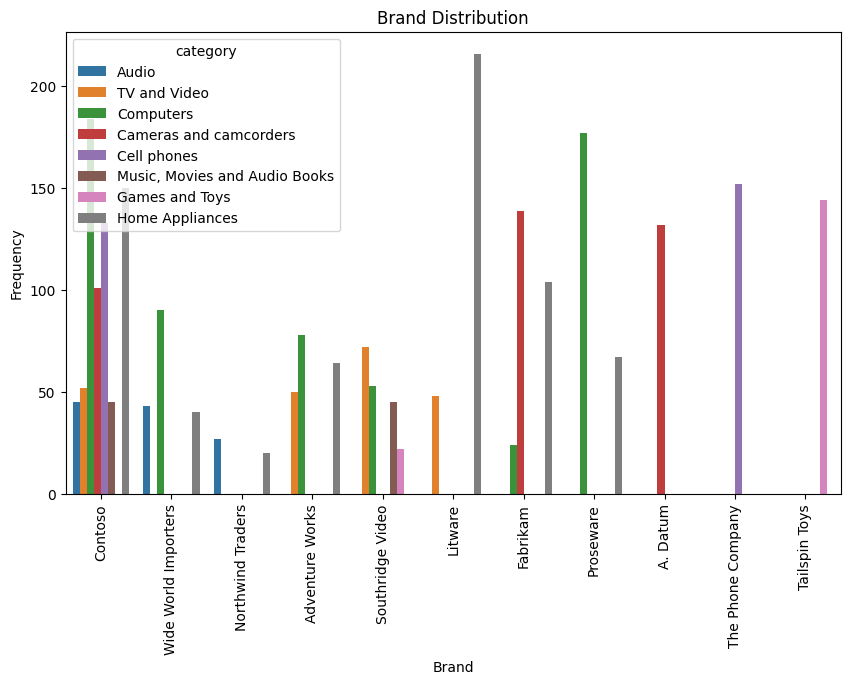

In [ ]:
# Brand Distribution by category
plt.figure(figsize=(10,6))
sns.countplot(data=df_products,x="brand",hue="category")
plt.title("Brand Distribution")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)

plt.show()

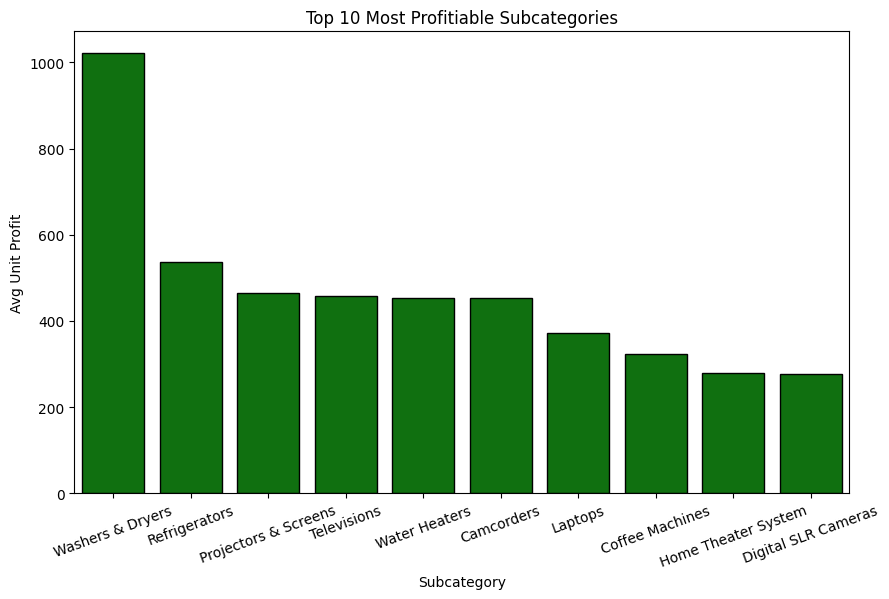

In [ ]:
# Top most profitiable subcategories
subcategory_group = df_products.groupby(by="subcategory")["unit_profit"].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=subcategory_group,x="subcategory",y="unit_profit",color="green",edgecolor="black")
plt.title("Top 10 Most Profitiable Subcategories")
plt.xlabel("Subcategory")
plt.ylabel("Avg Unit Profit")
plt.xticks(rotation = 20)

plt.show()

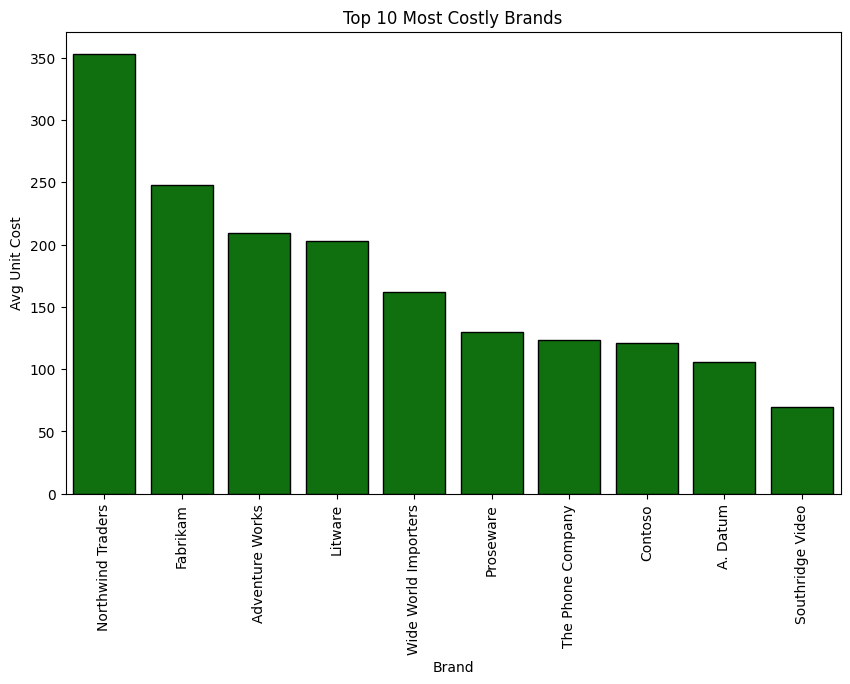

In [ ]:
# Top 10 Most Costly brands
brand_group = df_products.groupby(by="brand")["unit_cost_usd"].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=brand_group,x="brand",y="unit_cost_usd",color="green",edgecolor="black")
plt.title("Top 10 Most Costly Brands")
plt.xlabel("Brand")
plt.ylabel("Avg Unit Cost")
plt.xticks(rotation = 90)

plt.show()

In [ ]:
# Checking first 5 row
df_products.head()

,productkey,product_name,brand,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category,unit_profit
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,6.37
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio,6.37
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio,7.12
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio,10.57
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio,10.57


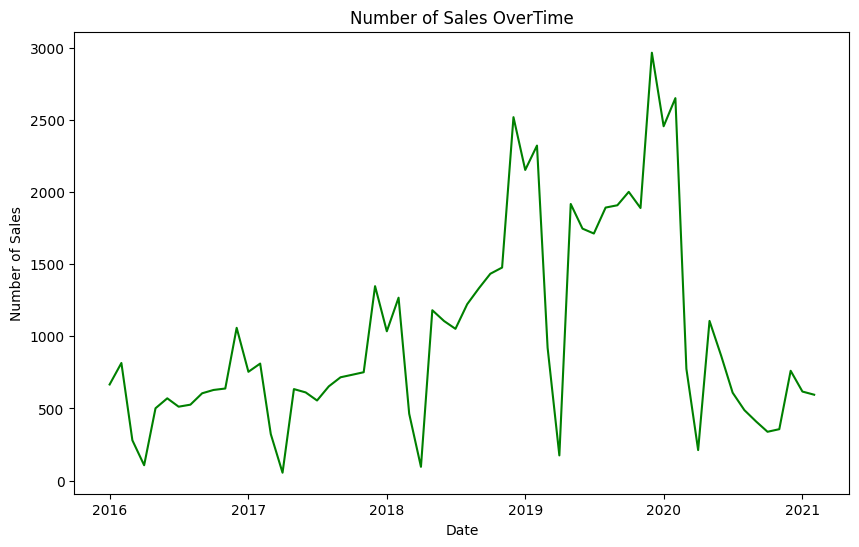

In [ ]:
# Total sales over time
sales_grouped = df_sales.groupby(by=df_sales["order_date"].dt.to_period("M"))["order_number"].count().reset_index()
sales_grouped['order_date'] = sales_grouped['order_date'].dt.to_timestamp()
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_grouped,x="order_date",y="order_number",color="green")
plt.title("Number of Sales OverTime")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.xticks(rotation = 0)

plt.show()

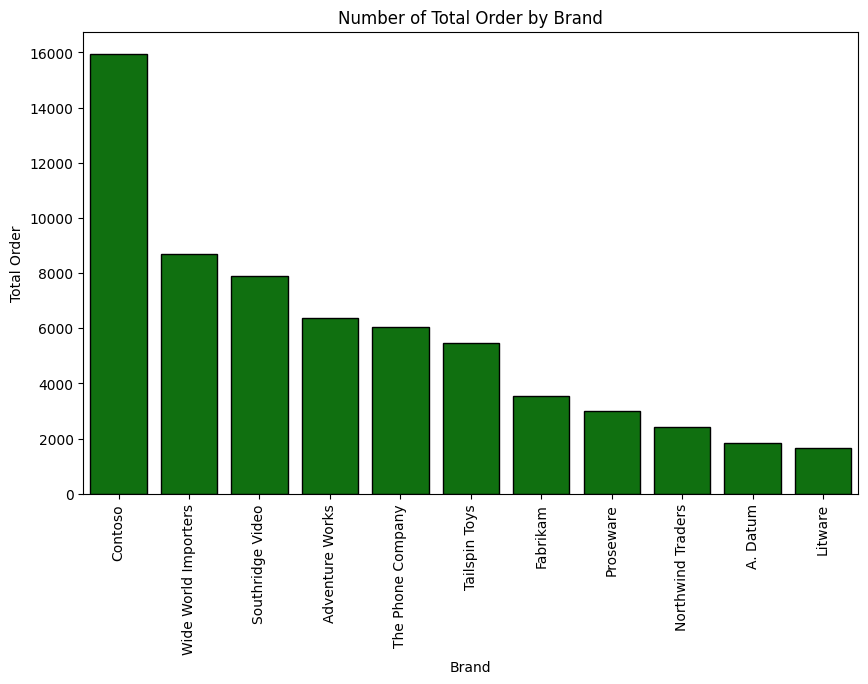

In [ ]:
# Number of Total Order by brand
top10_products = pd.merge(df_sales,df_products,how="left",on="productkey")
deneme = top10_products["brand"].value_counts().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=deneme,x="brand",y="count",color="green",edgecolor="black")
plt.title("Number of Total Order by Brand")
plt.xlabel("Brand")
plt.ylabel("Total Order")
plt.xticks(rotation = 90)

plt.show()

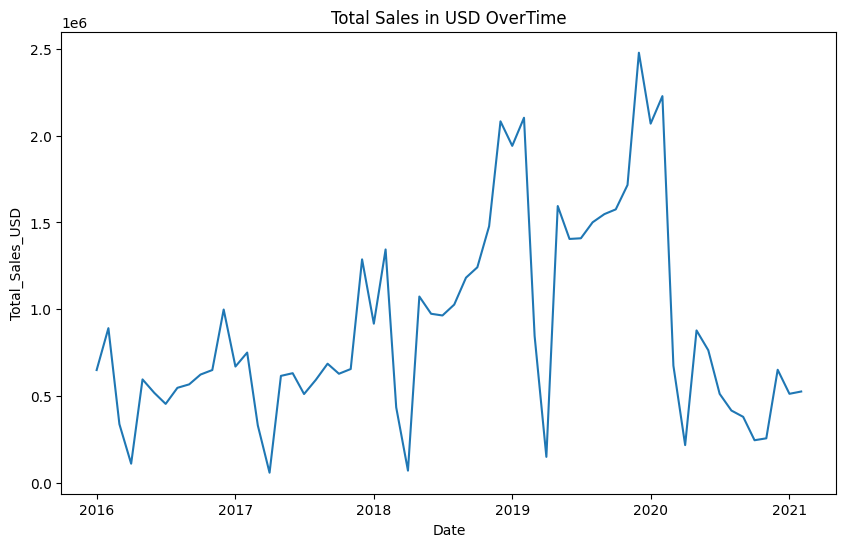

In [ ]:
# Total Sales usd Overtime
total_sales_overtime = df_sales_merge.groupby(by=df_sales_merge["Order Date"].dt.to_period("M"))["total_sales_usd"].sum().reset_index()
total_sales_overtime["Order Date"] = total_sales_overtime["Order Date"].dt.to_timestamp()

plt.figure(figsize=(10,6))
sns.lineplot(data=total_sales_overtime,x="Order Date",y="total_sales_usd")
plt.title("Total Sales in USD OverTime")
plt.xlabel("Date")
plt.ylabel("Total_Sales_USD")

plt.show()

In [ ]:
# Creating total_profit column 
df_sales_merge["total_profit_usd"] = df_sales_merge["Quantity"] * df_sales_merge["profit"]


In [ ]:
# Checking first 5 row
df_sales.head()

,order_number,line_item,order_date,delivery_date,customerkey,storekey,productkey,quantity,currency_code
0,366000,1,2016-01-01,2016-01-13,265598,10.0,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,10.0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,10.0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,10.0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,10.0,373,1,CAD


<Axes: ylabel='count'>

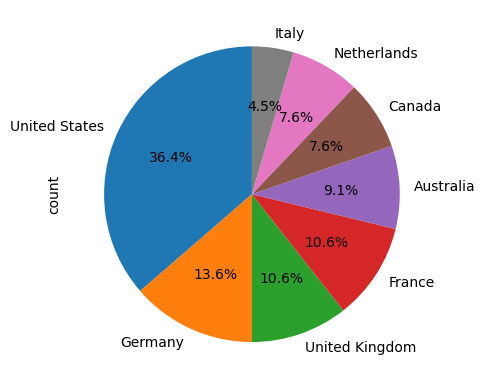

In [ ]:
# Country Distribution
df_stores["country"].value_counts().plot(kind="pie",autopct="%1.1f%%",startangle = 90)

In [ ]:
# Checking first 5 row
df_stores.head()

,storekey,country,state,square_meters,open_date,store_category,store_size
0,1,Australia,Australian Capital Territory,595.0,2008-01-01,Old Store,Med
1,2,Australia,Northern Territory,665.0,2008-01-12,Old Store,Med
2,3,Australia,South Australia,2000.0,2012-01-07,Old Store,Large
3,4,Australia,Tasmania,2000.0,2010-01-01,Old Store,Large
4,5,Australia,Victoria,2000.0,2015-12-09,Old Store,Large


In [ ]:
# Joining two dataframe on storekey
store_merged = pd.merge(df_sales,df_stores,how='left',on="storekey")
store_merged

,order_number,line_item,order_date,delivery_date,customerkey,storekey,productkey,quantity,currency_code,country,state,square_meters,open_date,store_category,store_size
0,366000,1,2016-01-01,2016-01-13,265598,10.0,1304,1,CAD,Canada,Nunavut,1210.0,2015-04-04,Old Store,Med
1,366001,1,2016-01-01,2016-01-13,1269051,10.0,1048,2,USD,Canada,Nunavut,1210.0,2015-04-04,Old Store,Med
2,366001,2,2016-01-01,2016-01-13,1269051,10.0,2007,1,USD,Canada,Nunavut,1210.0,2015-04-04,Old Store,Med
3,366002,1,2016-01-01,2016-01-12,266019,10.0,1106,7,CAD,Canada,Nunavut,1210.0,2015-04-04,Old Store,Med
4,366002,2,2016-01-01,2016-01-12,266019,10.0,373,1,CAD,Canada,Nunavut,1210.0,2015-04-04,Old Store,Med
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-27,1216913,43.0,632,3,USD,United States,Alaska,1190.0,2015-01-01,Old Store,Med
62880,2243031,1,2021-02-20,2021-02-24,511229,43.0,98,4,EUR,United States,Alaska,1190.0,2015-01-01,Old Store,Med
62881,2243032,1,2021-02-20,2021-02-23,331277,43.0,1613,2,CAD,United States,Alaska,1190.0,2015-01-01,Old Store,Med
62882,2243032,2,2021-02-20,2021-02-23,331277,43.0,1717,2,CAD,United States,Alaska,1190.0,2015-01-01,Old Store,Med


In [ ]:
# joining on Productkey
all_merged = pd.merge(store_merged,df_products,how='left',on="productkey")


In [ ]:
# Creating new 2 column total sales and total profit 
all_merged["total_sales_usd"] = all_merged["quantity"] * all_merged["unit_price_usd"]
all_merged["total_profit_usd"] = all_merged["quantity"] * all_merged["unit_profit"]

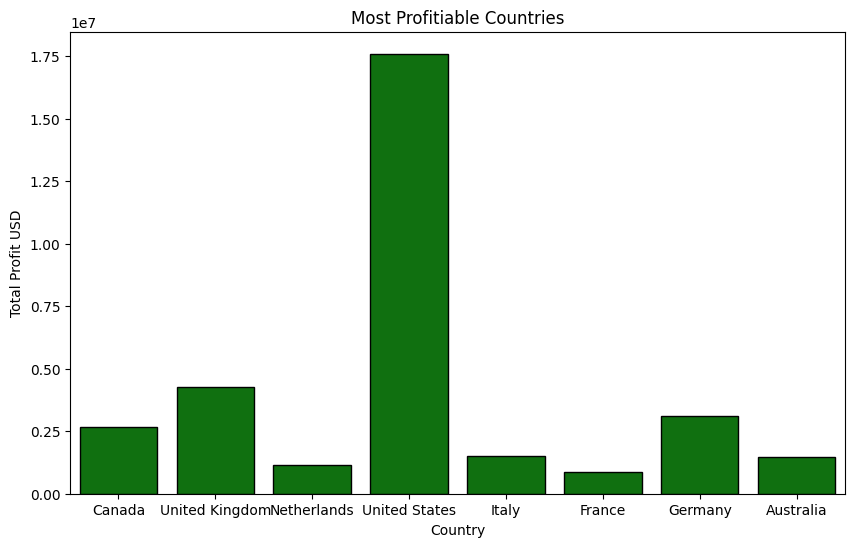

In [ ]:
# Most Profitable Countries
plt.figure(figsize=(10,6))
sns.barplot(data=all_merged,x="country",y="total_profit_usd",estimator=sum,errorbar=None,color="green",edgecolor="black")
plt.title("Most Profitiable Countries")
plt.xlabel("Country")
plt.ylabel("Total Profit USD")

plt.show()

**Step 7- Create a connection with SQL server and Load the DataFrames to SQL server**

In [ ]:
# Importing necessary libraries to create a conneciton with sql server
import psycopg2
from sqlalchemy import create_engine

**Step 8- Save the DataFrames as CSV**

In [ ]:
# Saving DataFrames as CSV
df_customers.to_csv("Cleaned_customers.csv",index=False)
df_exchange_rates.to_csv("Cleaned_exchange.csv",index=False)
df_products.to_csv("Cleaned_products.csv",index=False)
df_sales.to_csv("Cleaned_sales.csv",index=False)
df_stores.to_csv("Cleaned_stores.csv",index=False)

# SQL Queries 
[Click Here to see SQL queries](SQL.sql)

# Dashboard 
[Click here to see Dashboard](https://public.tableau.com/app/profile/mustafa.zkul/viz/GlobalELectronics/SalesDashboard)